<a href="https://colab.research.google.com/github/sadovnichek/NumericCalculus/blob/main/DiffEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Определяем правую часть дифференциального уравнения и её производные до 3 порядка

In [138]:
import math
import matplotlib.pyplot as plt

def f(x, y):
  return -x * (y + 1)

def df(x, y):
  return (y + 1)*(x * x - 1)

def d2f(x, y):
  return (y + 1)*(3 * x - math.pow(x, 3))

def d3f(x, y):
  return (y + 1)*(3 - 6 * x * x + math.pow(x, 4))

def solution(x):
  return 2 * math.pow(math.e, x * x / (-2)) - 1

Задаём параметры

In [139]:
a = 0
b = 1
m = 10
h = (b - a) / m
# Задача Коши
start_x = 0
start_y = 1

Метод Эйлера с пересчётом

In [140]:
def euler_recount():
  x = start_x
  y = start_y
  for i in range(0, m):
    next_x = x + h
    next_y = y + h / 2 * (f(x, y) + f(next_x, y + h * f(x, y)))
    yield (next_x, next_y)
    x = next_x
    y = next_y

Неявный метод Эйлера

In [141]:
def implicit_euler():
  x = start_x
  y = start_y
  for i in range(0, m):
    next_x = x + h
    next_y = (y - h * next_x) / (1 + h * next_x)
    yield (next_x, next_y)
    x = next_x
    y = next_y

Метод Тейлора 4 порядка

In [142]:
def taylor_4():
  x = start_x
  y = start_y
  for i in range(0, m):
    next_x = x + h
    next_y = y + h * f(x, y) + h * h * df(x, y) / 2 + math.pow(h, 3) * d2f(x, y) / 6 + math.pow(h, 4) * d3f(x, y) / 24
    yield (next_x, next_y)
    x = next_x
    y = next_y

Метод для рисования графика. Аргумент - метод, по которому вычисляется пара (x, y)

In [143]:
def draw(method):
  x_values = [start_x]
  y_values = [start_y]
  precision = []

  for (x, y) in method():
    x_values.append(x)
    y_values.append(y)
    precision.append(abs(y - solution(x)))

  print(max(precision))
  plt.grid()
  plt.plot(x_values, y_values, '-bo')
  plt.show()

0.00037457589487405185


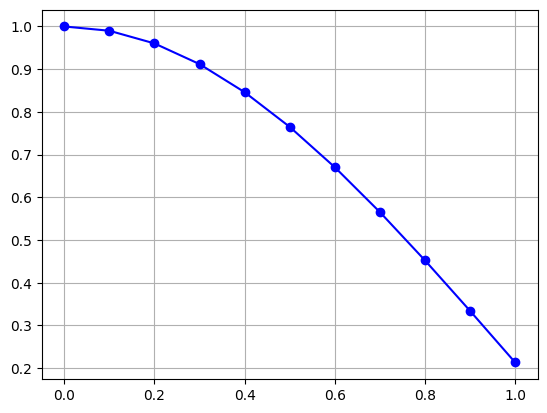

In [144]:
draw(euler_recount)

0.0436042957593874


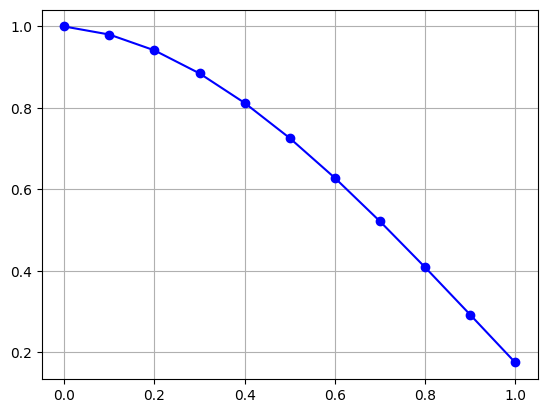

In [145]:
draw(implicit_euler)

5.287191001485114e-06


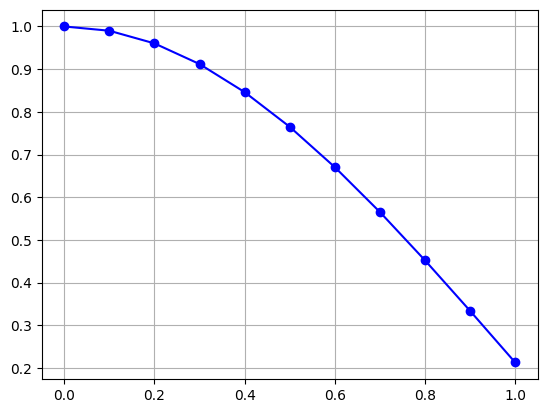

In [146]:
draw(taylor_4)